In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
df =pd.read_csv('E:/DSM/data/WA_Fn-UseC_-Marketing-Customer-Value-Analysis (2).csv')

In [4]:
df.shape

(9134, 24)

In [5]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. Variable Encoding

## 2.1. Response Variable: Response

In [6]:
df['Engaged'] = df['Response'].apply(lambda x: 1 if x== 'Yes' else 0)

In [7]:
df['Engaged'].mean()

np.float64(0.14320122618786948)

## 2.2. Features

In [8]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Engaged
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,0.143201
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.350297
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,0.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,0.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,0.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,1.000000


In [9]:
continuous_features = [
    'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
    'Months Since Last Claim', 'Months Since Policy Inception',
    'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount'
]

#### - Creating Dummy Variables

one hot encoding

In [10]:
columns_to_encode = [
    'Sales Channel', 'Vehicle Size', 'Vehicle Class', 'Policy', 'Policy Type',
    'EmploymentStatus', 'Marital Status', 'Education', 'Coverage'
]



In [11]:
categorical_features = []
for col in columns_to_encode:
    encoded_df = pd.get_dummies(df[col])
    encoded_df.columns = [col.replace(' ', '.') + '.' + x for x in encoded_df.columns]
    categorical_features += list(encoded_df.columns)

    df = pd.concat([df, encoded_df], axis=1)
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Marital.Status.Married,Marital.Status.Single,Education.Bachelor,Education.College,Education.Doctor,Education.High School or Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,True,False,True,False,False,False,False,True,False,False
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,False,True,True,False,False,False,False,False,True,False
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,True,False,True,False,False,False,False,False,False,True
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,True,False,True,False,False,False,False,True,False,False
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,False,True,True,False,False,False,False,True,False,False


#### - Encoding Gender

In [12]:
df['Is.Female'] =df['Gender'].apply(lambda x: 1 if x== 'Yes' else 0)
categorical_features.append('Is.Female')

#### - all features & response

In [13]:
all_features =continuous_features+ categorical_features
response = 'Engaged'

In [14]:
sample_df = df[all_features + [response]]
sample_df.columns = [x.replace(' ', '.') for x in sample_df.columns]
all_features = [x.replace(' ', '.') for x in all_features]

 **Months Since Policy Inception** refers to the number of months a policy has been active since it was issued.

In [15]:
sample_df.head()

,Customer.Lifetime.Value,Income,Monthly.Premium.Auto,Months.Since.Last.Claim,Months.Since.Policy.Inception,Number.of.Open.Complaints,Number.of.Policies,Total.Claim.Amount,Sales.Channel.Agent,Sales.Channel.Branch,...,Education.Bachelor,Education.College,Education.Doctor,Education.High.School.or.Below,Education.Master,Coverage.Basic,Coverage.Extended,Coverage.Premium,Is.Female,Engaged
0,2763.519279,56274,69,32,5,0,1,384.811147,True,False,...,True,False,False,False,False,True,False,False,0,0
1,6979.535903,0,94,13,42,0,8,1131.464935,True,False,...,True,False,False,False,False,False,True,False,0,0
2,12887.431650,48767,108,18,38,0,2,566.472247,True,False,...,True,False,False,False,False,False,False,True,0,0
3,7645.861827,0,106,18,65,0,7,529.881344,False,False,...,True,False,False,False,False,True,False,False,0,0
4,2813.692575,43836,73,12,44,0,1,138.130879,True,False,...,True,False,False,False,False,True,False,False,0,0


# 3. Training & Testing

In [16]:
from sklearn.model_selection import train_test_split#one of the function split data

In [17]:
random_seed = 42 #subseet comment 

In [18]:
x_train, x_test, y_train, y_test = train_test_split(sample_df[all_features], sample_df[response], test_size=0.3,random_state=random_seed)

In [19]:
sample_df.shape

(9134, 51)

In [20]:
x_train.shape

(6393, 50)

In [21]:
x_test.shape

(2741, 50)

## 3.1. Building RandomForest Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf_model = RandomForestClassifier(
    n_estimators=200,#tree depth(number of estimators)
    max_depth=5
)

In [24]:
rf_model.fit(X=x_train, y=y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

#### - Individual Trees

In [25]:
rf_model.estimators_  #hyper peramitter and _ is continues dont end

[DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=693260668),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1253028291),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1599138507),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=903048222),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1112480207),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=768875708),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1198487627),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1813060925),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=501331122),
 DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                        random_state=1215567047),
 DecisionTreeClassif

max_features='sqrt'- squre2 of dataset

In [26]:
rf_model.estimators_[0]

DecisionTreeClassifier(max_depth=5, max_features='sqrt', random_state=693260668)

In [27]:
rf_model.predict(x_test)[:15]#overall test data predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
rf_model.estimators_[3].predict(x_test)[:10]# 1st 10 columns data

c:\Users\gthri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
rf_model.estimators_[58].predict(x_test)[:10]

c:\Users\gthri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
rf_model.estimators_[2].predict(x_test)[:10]

c:\Users\gthri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
rf_model.estimators_[3].predict(x_test)[:10]

c:\Users\gthri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
rf_model.estimators_[144].predict(x_test)[:10]

c:\Users\gthri\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### - Feature Importances

In [33]:
rf_model.feature_importances_

array([0.0569555 , 0.08155529, 0.04531258, 0.03101401, 0.04591231,
       0.01455725, 0.01884798, 0.07067653, 0.0428272 , 0.00624841,
       0.01105741, 0.00504961, 0.00798722, 0.00713245, 0.01003559,
       0.00412622, 0.00067304, 0.00376247, 0.00363295, 0.00372804,
       0.00343341, 0.00045836, 0.00154961, 0.0012821 , 0.00248626,
       0.00119785, 0.00090609, 0.00057699, 0.00070842, 0.00192136,
       0.00110839, 0.00181647, 0.00113848, 0.00601687, 0.0262727 ,
       0.00423639, 0.3308351 , 0.02296721, 0.04586246, 0.01880747,
       0.01488156, 0.00518723, 0.00468546, 0.00598303, 0.00563861,
       0.00585078, 0.00413529, 0.00570622, 0.00325778, 0.        ])

In [34]:
feature_importance_df = pd.DataFrame(list(zip(rf_model.feature_importances_, all_features)))
feature_importance_df.columns = ['feature.importance', 'feature']

feature_importance_df.sort_values(by='feature.importance', ascending=False)#zip join the dataframe

,feature.importance,feature
36,0.330835,EmploymentStatus.Retired
1,0.081555,Income
7,0.070677,Total.Claim.Amount
0,0.056955,Customer.Lifetime.Value
4,0.045912,Months.Since.Policy.Inception
38,0.045862,Marital.Status.Divorced
2,0.045313,Monthly.Premium.Auto
8,0.042827,Sales.Channel.Agent
3,0.031014,Months.Since.Last.Claim
34,0.026273,EmploymentStatus.Employed


## 3.2. Evaluating Models

#### - Accuracy, Precision, and Recall

sensitivity(recall)     (actual)TP/TP+FN

precision TP/TP+FP

Accuracy NO OF CORRECT PREDICTIONS/ TOTAL NO OF RECORDS.

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [36]:
in_sample_preds = rf_model.predict(x_train)
out_sample_preds = rf_model.predict(x_test)

In [37]:
print('In-Sample Accuracy: %0.4f' % accuracy_score(y_train, in_sample_preds)) #insample train data outsample test data
print('Out-of-Sample Accuracy: %0.4f' % accuracy_score(y_test, out_sample_preds))

In-Sample Accuracy: 0.8807
Out-of-Sample Accuracy: 0.8679


In [38]:
print('In-Sample Precision: %0.4f' % precision_score(y_train, in_sample_preds))
print('Out-of-Sample Precision: %0.4f' % precision_score(y_test, out_sample_preds))

In-Sample Precision: 0.9595
Out-of-Sample Precision: 0.8730


In [39]:
print('In-Sample Recall: %0.4f' % recall_score(y_train, in_sample_preds))
print('Out-of-Sample Recall: %0.4f' % recall_score(y_test, out_sample_preds))

In-Sample Recall: 0.1580
Out-of-Sample Recall: 0.1345


Your Random Forest model shows good accuracy both in-sample (0.8807) and out-of-sample (0.8679), indicating it generalizes well. Precision is high in both cases (0.9595 in-sample, 0.8730 out-sample), meaning the model makes fewer false positives. However, recall is very low (0.1580 in-sample, 0.1345 out-sample), suggesting it struggles to detect positive cases. You may need to adjust class weights or thresholds to improve recall.

#### - ROC & AUC

In [40]:
from sklearn.metrics import roc_curve, auc

In [41]:
in_sample_preds = rf_model.predict_proba(x_train)[:,1]
out_sample_preds = rf_model.predict_proba(x_test)[:,1]

In [42]:
in_sample_fpr, in_sample_tpr, in_sample_thresholds = roc_curve(y_train, in_sample_preds)
out_sample_fpr, out_sample_tpr, out_sample_thresholds = roc_curve(y_test, out_sample_preds)

In [43]:
in_sample_roc_auc = auc(in_sample_fpr, in_sample_tpr)
out_sample_roc_auc = auc(out_sample_fpr, out_sample_tpr)

print('In-Sample AUC: %0.4f' % in_sample_roc_auc)
print('Out-Sample AUC: %0.4f' % out_sample_roc_auc)

In-Sample AUC: 0.8896
Out-Sample AUC: 0.8377


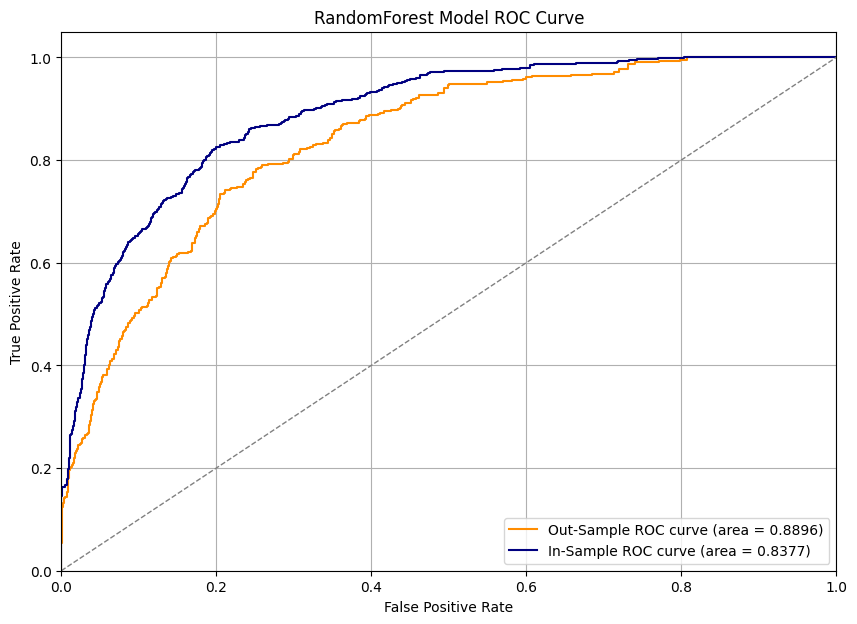

In [44]:
plt.figure(figsize=(10,7))

plt.plot(
    out_sample_fpr, out_sample_tpr, color='darkorange', label='Out-Sample ROC curve (area = %0.4f)' % in_sample_roc_auc
)
plt.plot(
    in_sample_fpr, in_sample_tpr, color='navy', label='In-Sample ROC curve (area = %0.4f)' % out_sample_roc_auc
)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.grid()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest Model ROC Curve')
plt.legend(loc="lower right")

plt.show()

This ROC curve compares the performance of a RandomForest model on in-sample (training) and out-sample (test) data. The out-sample AUC (0.8896) is slightly higher than the in-sample AUC (0.8377), indicating good generalization. The model performs well but may slightly overfit since test performance is better.

in sample traning data , out sample (unseen data test)non traning. true positive rate dha highest errudha dha best model . area under the curve 0 to 1 dha errukanum . 0.5 ku mela errudha good model .